In [1]:
import pandas as pd
apple = pd.read_csv("AAPL.csv")
print(apple.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2020-07-21  99.172501  99.250000  96.742500  97.000000  96.350784   
1  2020-07-22  96.692497  97.974998  96.602501  97.272499  96.621452   
2  2020-07-23  96.997498  97.077499  92.010002  92.845001  92.223587   
3  2020-07-24  90.987503  92.970001  89.144997  92.614998  91.995125   
4  2020-07-27  93.709999  94.904999  93.480003  94.809998  94.175430   

      Volume  
0  103433200  
1   89001600  
2  197004400  
3  185438800  
4  121214000  


In [2]:
print(apple.shape)

(252, 7)


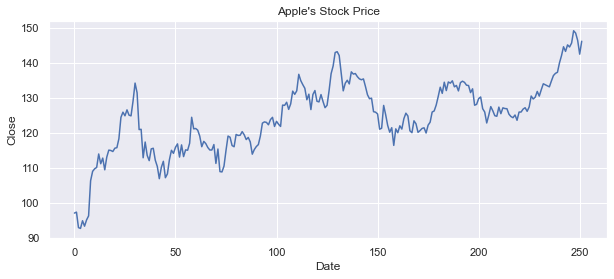

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(apple["Close"])
plt.show()

In [4]:
apple = apple[["Close"]]
print(apple.head())

       Close
0  97.000000
1  97.272499
2  92.845001
3  92.614998
4  94.809998


In [5]:
# Creating a variable to predict ‘X’ days in the future
futureDays = 30

In [6]:
# Create a new target column shifted ‘X’ units/days up:

apple["Prediction"] = apple[["Close"]].shift(-futureDays)
print(apple.head())
print(apple.tail())

       Close  Prediction
0  97.000000  134.179993
1  97.272499  131.399994
2  92.845001  120.879997
3  92.614998  120.959999
4  94.809998  112.820000
          Close  Prediction
247  149.149994         NaN
248  148.479996         NaN
249  146.389999         NaN
250  142.449997         NaN
251  146.149994         NaN


In [7]:
# To create a feature dataset (x) and convert into a numpy array and remove last ‘x’ rows/days:
import numpy as np
x = np.array(apple.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[ 97.      ]
 [ 97.272499]
 [ 92.845001]
 [ 92.614998]
 [ 94.809998]
 [ 93.252502]
 [ 95.040001]
 [ 96.190002]
 [106.260002]
 [108.9375  ]
 [109.665001]
 [110.0625  ]
 [113.902496]
 [111.112503]
 [112.727501]
 [109.375   ]
 [113.010002]
 [115.010002]
 [114.907501]
 [114.607498]
 [115.5625  ]
 [115.707497]
 [118.275002]
 [124.370003]
 [125.857498]
 [124.824997]
 [126.522499]
 [125.010002]
 [124.807503]
 [129.039993]
 [134.179993]
 [131.399994]
 [120.879997]
 [120.959999]
 [112.82    ]
 [117.32    ]
 [113.489998]
 [112.      ]
 [115.360001]
 [115.540001]
 [112.129997]
 [110.339996]
 [106.839996]
 [110.080002]
 [111.809998]
 [107.120003]
 [108.220001]
 [112.279999]
 [114.959999]
 [114.089996]
 [115.809998]
 [116.790001]
 [113.019997]
 [116.5     ]
 [113.160004]
 [115.080002]
 [114.970001]
 [116.970001]
 [124.400002]
 [121.099998]
 [121.190002]
 [120.709999]
 [119.019997]
 [115.980003]
 [117.510002]
 [116.870003]
 [115.75    ]
 [115.040001]
 [115.050003]
 [116.599998]
 [111.199997]
 [115.

In [8]:
#To create a target dataset (y) and convert it to a numpy array and get all of the target values except the last ‘x’ rows days:
y = np.array(apple["Prediction"])[:-futureDays]
print(y)

[134.179993 131.399994 120.879997 120.959999 112.82     117.32
 113.489998 112.       115.360001 115.540001 112.129997 110.339996
 106.839996 110.080002 111.809998 107.120003 108.220001 112.279999
 114.959999 114.089996 115.809998 116.790001 113.019997 116.5
 113.160004 115.080002 114.970001 116.970001 124.400002 121.099998
 121.190002 120.709999 119.019997 115.980003 117.510002 116.870003
 115.75     115.040001 115.050003 116.599998 111.199997 115.32
 108.860001 108.769997 110.440002 114.949997 119.029999 118.690002
 116.32     115.970001 119.489998 119.209999 119.260002 120.300003
 119.389999 118.029999 118.639999 117.339996 113.849998 115.169998
 116.029999 116.589996 119.050003 122.720001 123.080002 122.940002
 122.25     123.75     124.379997 121.779999 123.239998 122.410004
 121.779999 127.879997 127.809998 128.699997 126.660004 128.229996
 131.880005 130.960007 131.970001 136.690002 134.869995 133.720001
 132.690002 129.410004 131.009995 126.599998 130.919998 132.050003
 128.979

In [9]:
# Split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [10]:
# Creating Models
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)


In [11]:
# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [12]:
xfuture = apple.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[134.720001]
 [134.389999]
 [133.580002]
 [133.479996]
 [131.460007]
 [132.539993]
 [127.849998]
 [128.100006]
 [129.740005]
 [130.210007]
 [126.849998]
 [125.910004]
 [122.769997]
 [124.970001]
 [127.449997]
 [126.269997]
 [124.849998]
 [124.690002]
 [127.309998]
 [125.43    ]
 [127.099998]
 [126.900002]
 [126.849998]
 [125.279999]
 [124.610001]
 [124.279999]
 [125.059998]
 [123.540001]
 [125.889999]
 [125.900002]]


In [13]:
# To see the model tree prediction
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [124.279999  126.900002  123.540001  127.349998  120.709999  129.639999
 130.149994  131.789993  130.460007  132.300003  145.110001  133.699997
 133.410004  116.970001  134.779999  124.849998  115.080002  137.270004
 139.960007  130.360001  144.570007  143.240005  145.110001  144.5
 145.639999  149.149994  148.479996  146.389999  142.449997  136.2099955]


In [14]:
# To see the model linear regression prediction
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [130.14504438 130.03004232 129.74776728 129.71291629 129.00897237
 129.3853356  127.75092398 127.83804902 128.40957061 128.57336113
 127.402435   127.07485744 125.98059957 126.74727674 127.61152804
 127.20031103 126.70545702 126.64970017 127.56273993 126.90758133
 127.48955724 127.41986084 127.402435   126.85530763 126.62182071
 126.50681864 126.77863971 126.24893749 127.06788592 127.07137185]


<ipython-input-15-c44f59669658>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


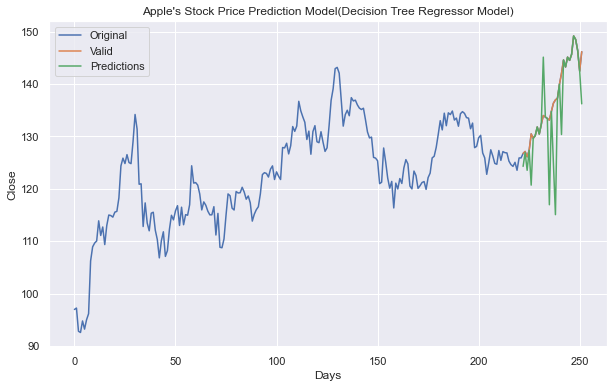

In [15]:
# Visualize decision tree predictions
predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

<ipython-input-16-2c1dfe8b2215>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


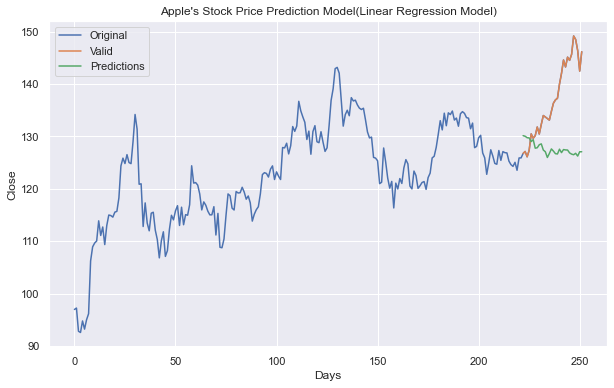

In [16]:
# Visualize the linear model predictions
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()